## Mariusz Kuchta gr. 2a (czw. 10.00 - 11.30)

### Laboratoria 2 - 14.10.21
#### TIER protocol i tidy data


In [50]:
len("Kuchta") % 5 + 1

2

Czyszczony będzie zestaw 2. zawierający dane o gruźlicy w różnych grupach pacjentów

In [51]:
import pandas as pd

# poprawienie błędnego odczytywania kodu iso-2 Namibii - 'NA' odczytywany jako NaN
d = pd.read_csv("../OriginalData/tb.csv", keep_default_na=False, na_values=['']) 

d.head()

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Melting

dm = pd.melt(d, id_vars=['iso2', 'year'], value_vars=['new_sp', 'new_sp_m04', 'new_sp_m514', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_mu', 'new_sp_f04', 'new_sp_f514', 'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sp_fu'])

dm.head()

dm.to_csv('../AnalysisData/tb_melted.csv', index=False)

In [53]:
# Tidy Data

def only_digits(s : str) -> str:
    return ''.join([i for i in s if i.isdigit()])

dt = pd.DataFrame({
    'iso2' : dm['iso2'],
    'year' : dm['year'],
    'sex'  : ['m'  if 'm' in rec else 'f' if 'f' in rec else 's' for rec in dm['variable']],
    'age'  : [''.join(only_digits(st)) if st[-1].isdigit() else 'all' if st == 'new_sp' else 'undefined' for st in
             dm['variable']],
    'cases': dm['value']
})

dt.head()

,iso2,year,sex,age,cases
0,AD,1989,s,all,NaN
1,AD,1990,s,all,NaN
2,AD,1991,s,all,NaN
3,AD,1992,s,all,NaN
4,AD,1993,s,all,15.0


In [54]:
dt[(dt['sex']=='s') & (dt['cases']==dt['cases'])].head()

,iso2,year,sex,age,cases
4,AD,1993,s,all,15.0
5,AD,1994,s,all,24.0
6,AD,1996,s,all,8.0
7,AD,1997,s,all,17.0
8,AD,1998,s,all,1.0


In [55]:
# zmiana nazw kolumn
dt.rename(columns={'iso2'  : 'country'}, inplace=True)

dt.replace({
    '04'   : '0-4',
    '014'  : '0-14',
    '514'  : '5-14',
    '2534' : '25-34',
    '3544' : '35-44',
    '4554' : '45-54',
    '5564' : '55-64',
    '65'   : '65+'
}, inplace=True)

# sortowanie
dts = dt.sort_values(by=['year', 'country', 'sex'])
dts = dts.reset_index(drop=True)

dts.to_csv('../AnalysisData/tb_tidy.csv', index=False)

dts.head()

,country,year,sex,age,cases
0,AE,1980,f,0-4,NaN
1,AE,1980,f,5-14,NaN
2,AE,1980,f,0-14,NaN
3,AE,1980,f,1524,NaN
4,AE,1980,f,25-34,NaN


In [56]:
# Usunięcie wierszy z NaN

dts.dropna(subset = ["cases"], inplace=True)
# dts = dts.sort_values(by=['year', 'country', 'sex'])
# dts = dts.reset_index(drop=True)

dts.to_csv('../AnalysisData/tb_nona.csv', index=False)

dts.head()

,country,year,sex,age,cases
632,CA,1980,f,0-14,18.0
633,CA,1980,f,1524,62.0
634,CA,1980,f,25-34,51.0
635,CA,1980,f,35-44,34.0
636,CA,1980,f,45-54,31.0


In [57]:
dts[dts['country']=='CN']

,country,year,sex,age,cases
53906,CN,1993,s,all,84898.0
57707,CN,1994,s,all,104729.0
61637,CN,1995,f,0-14,1169.0
61638,CN,1995,f,1524,10890.0
61639,CN,1995,f,25-34,13250.0
...,...,...,...,...,...
117573,CN,2008,m,35-44,56182.0
117574,CN,2008,m,45-54,55740.0
117575,CN,2008,m,55-64,57492.0
117576,CN,2008,m,65+,69678.0


<AxesSubplot:xlabel='year'>

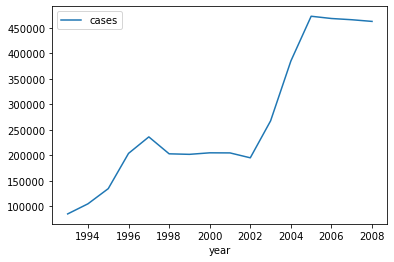

In [58]:
# Wykres sumy zakażeń na gruźlicę w Chinach

dts[(dts['country']=='CN') & (dts['sex']=='s')].plot(x="year", y='cases')